In [1]:
pwd

u'/home/riddhisw/Documents/2017/Scripts_Git/v0/TEST_SCRIPTS_v0/LSF'

In [2]:
import sys
sys.path.append('../../../')
ver = 0
datapath = '../../DATA_v'+str(ver)+'_/' # host data from Archive/DRAFT_1
savetopath = '../../DATA_v'+str(ver)+'/' #testingLSF/' # saves new data in v0/DATA_v0
savefigpath = '../../FIGS_v'+str(ver)+'/LSF_Tuning_Stp_Fwds_YLINEAR_'
saveFIG = False

import numpy as np
import matplotlib.pyplot as plt
from ls.LSF_risk_analysis import LSF_Optimisation as lsfopt
import matplotlib.gridspec as gridspec
from plot_tools.plot_helper_funcs import cm2inch

In [3]:
test_case = [15, 23, 24, 24, 24, 24, 22, 21, 21, 22, 27, 27, 27, 19, 19, 19]
variation = [12, 11, 1, 2, 4, 7, 2, 1, 5, 3, 1, 5, 8, 1, 5, 8]
nrows = len(test_case)


# MODEL
LSF_past_msmts = 101 ### BASE CASE
LSF_steps_forward = 50 ## CHANGE THIS FOR DIFFERENT MODELS
LSF_steps_between_msmts = 1
LSF_iter = 50

# ALPHAS
arr_alphas = np.asarray([10**item for item in range(-14, 2)])

We cross check against Archive/Draft_1/ls_filter/ for the following workbooks:

- Run LS Filtering for Story_X Cases
- FINAL Run LS Filtering for all Story and Test Cases - TUNED

**Figure 1: Picking alpha_0 for Gradient Descent using Deterministic Sampling**

The x-axis represents values of alpha_0 we have tried. The y_axis is the loss, namely the last value in the Error Train after 50 iterations. The 'x' represents min Loss value chosen in this set. The black line represented that we have manually chosen a alpha_0 smaller that alpha_0(x) for test cases 22, 21, and 19 to get better numerical stability. The need for manual tuning suggests our approach is 'good enough' but not robust enough for unsupervised learning.

**Figure 2: Plotting Error Trains for alpha0 (optimal) and other choices of alpha_0**

The x-axis represents number of iterations in Gradient Descent in statePredictions.py. The y-axis represents the Error Train. Gray lines represent all alpha_0 choices in Figure 1 which were rejected, on a log scale. The magenta line represents the Error Train for alpha0 picked via our tuning procedure. If magenta line lies below all gray curves, we know the tuning procedure is working.

**Figure 3 and 4: Changing the order of AR(q), q == num of past msmts, and re-tuning**

We now change number of past msmts and re-run tuning procedure for alpha_0. We plot the optimal error train for each choice of model.TThe x-axis represents number of iterations in Gradient Descent in statePredictions.py - in Fig3, it spans all iterations, in Fig 4, it zooms into the last 5 iterations prior to termination. We see that the choice of model (namely, number of past msmts) is sufficiently large at q=101 to produce sensible comparative analysis in all test_cases.

**Figure 5 and 6: Ensemble average of q=101, alpha_0 (tuned) and stps fwd**

We pick tuned q, alpha_0 and an arbitrary choice of stps fwd. We choose 50 different training datasets and we run gradient descent to learn the weights. We t

In Fig 5, the x-axis represents number of iterations in Gradient Descent in statePredictions.py. The y-axis represents the results Error Train (grey dots), with the mean of ErrTrains (red line) and variance (purple shade) provided for reference. 

In Fig 6, the x-axis represents *q*, the index denoting autoregressive weights. The y-axis represents the value of these weights learned from one run of Gradient Descent (grey dots), with the mean autoregressive weights over all training datasets (red line) and variance (purple shade) provided for reference. 

LKFFB: Data Loaded? Yes


../../../ls/statePredictions.py:75: RuntimeWarning: overflow encountered in square
  squared_error = (actual_values-predicted_values)**2


Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite


../../../ls/statePredictions.py:91: RuntimeWarning: overflow encountered in multiply
  gSummands = (np.dot(past_measurements,weights) - actual_values) * past_measurements


LKFFB: Data Loaded? Yes
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite
LKFFB: Data Loaded? Yes
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite
LKFFB: Data Loaded? Yes
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite
LKFFB: Data Loaded? Yes
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite
Lossval not finite


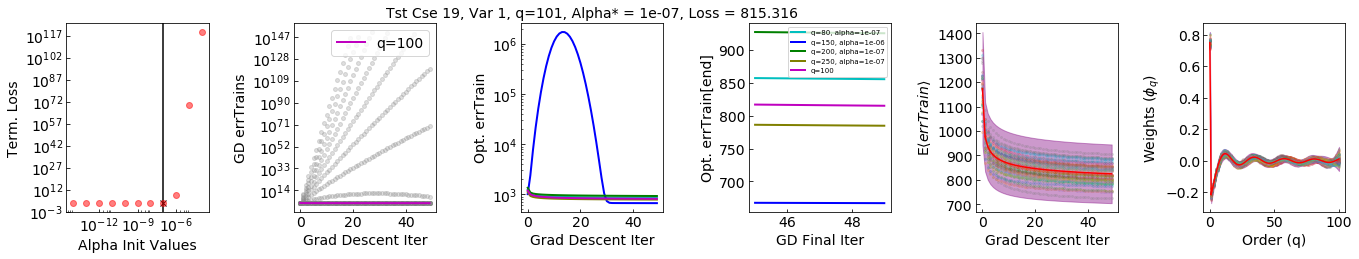

In [4]:
fig = plt.figure( figsize=( cm2inch(48), cm2inch(8*nrows) ) )
gs = gridspec.GridSpec(nrows, 6,
                       left=0.03, right=0.97, 
                       top=0.9, bottom=0.07, 
                       wspace=0.6, hspace=0.65)
fsize=14

past_msmt_scan = [80, 150, 200, 250]
PM_COLORS = ['c', 'b', 'g', 'olive', ]
XLABELS = ['Grad Descent Iter', r'Order (q)']
YLABELS = [r'E$\langle errTrain \rangle$', r'Weights ($\phi_q$)']

for idx_case in xrange(nrows):
    
    ax_1 = fig.add_subplot(gs[idx_case,0])
    ax_2 = fig.add_subplot(gs[idx_case,1])
    ax_3 = fig.add_subplot(gs[idx_case,2])
    ax_4 = fig.add_subplot(gs[idx_case,3])
    ax_5 = fig.add_subplot(gs[idx_case,4])
    ax_6 = fig.add_subplot(gs[idx_case,5])

    caseObject = lsfopt(test_case[idx_case], variation[idx_case],
                        LSF_past_msmts, LSF_steps_forward, datapath) # initialised with datapath only to access LKFFB truths

    pickalpha, order_idx, lossvalTrain, errTrains, weightTrains = caseObject.train_alpha0_manual(arr_alphas)
    
    # Plot min alpha chosen by opt procedure
    ax_1.plot(pickalpha, lossvalTrain[order_idx[0]], 'kx', markersize=6)    
    
    # Plot min alpha subject to additional manual tuning
    if test_case[idx_case]==21 or test_case[idx_case]==22 or test_case[idx_case]==19: # manually adjust this as pick_alpha of 10**6 breaks.
        pickalpha = 10**-7   
    ax_1.axvline(x=pickalpha, color='k')
    
    # Plot parameteters for reminaing runs
    ax_3.set_title('Tst Cse %s, Var %s, q=101, Alpha* = %s, Loss = %s'%(test_case[idx_case], variation[idx_case], arr_alphas[order_idx[0]],np.round(lossvalTrain[order_idx[0]],3) ), fontsize=fsize)

    macro_err_trains, macro_weights = caseObject.get_trained_weights_dist(pickalpha)
    caseObject.make_LS_Ensemble_data(pickalpha, savetopath, num_of_iterGD=LSF_iter) # makes LS_Ensemble_Folder
    
    
    for idx_p in xrange(len(past_msmt_scan)):
        
        caseObject_p = lsfopt(test_case[idx_case], variation[idx_case],
                              past_msmt_scan[idx_p], LSF_steps_forward, datapath) 
        
        pickalpha_p, order_idx_p, lossvalTrain_p, errTrains_p, weightTrains_p = caseObject_p.train_alpha0_manual(arr_alphas)
        
        ax_3.plot(errTrains_p[order_idx_p[0], :], c=PM_COLORS[idx_p], lw=2, label='q=%s, alpha=%s' %(past_msmt_scan[idx_p], pickalpha_p))
        ax_4.plot(range(45,50,1), errTrains_p[order_idx_p[0], 45:], c=PM_COLORS[idx_p], lw=2, label='q=%s, alpha=%s' %(past_msmt_scan[idx_p], pickalpha_p))

    ax_1.plot(arr_alphas,lossvalTrain, 'ro', alpha=0.5, markersize=6)
    
    ax_1.set_xscale('log')
    ax_1.set_yscale('log')
    ax_1.set(xlabel='Alpha Init Values', ylabel='Term. Loss')
    
    for idx_unopt in order_idx[1:]:
        ax_2.plot(errTrains[idx_unopt, :], 'o', c='gray', alpha=0.25, markersize=4)
    ax_2.plot(errTrains[order_idx[0], :], 'm', lw=2, label = 'q=100')
    ax_2.set_yscale('log')
    ax_2.legend(loc=1, fontsize=fsize)
    
    ax_2.set(xlabel='Grad Descent Iter', ylabel='GD errTrains')

    ax_3.plot(errTrains[order_idx[0], :], 'm', lw=2, label = 'q=100')
    ax_3.set(xlabel='Grad Descent Iter', ylabel='Opt. errTrain') 
    ax_3.set_yscale('log')
    
    ax_4.plot(range(45,50,1), errTrains[order_idx[0], 45:], 'm', lw=2, label = 'q=100')
    ax_4.set(xlabel='GD Final Iter', ylabel='Opt. errTrain[end]') 
    ax_4.set_yscale('linear')
    ax_4.legend(loc=1, fontsize=7)
    
    count=0
    
    for item in [macro_err_trains, macro_weights]:
        
        mean = np.mean(item, axis=0)
        three_std = 3.0*np.sqrt(np.var(item, axis=0))
        n = mean.shape[0]
        top = mean + three_std
        bottom = mean - three_std
        
        for idx_item in xrange(item.shape[0]):
            vars()['ax_'+str(count+5)].plot(range(n), item[idx_item, :], 'o', markersize=2, alpha=0.2)
        
        vars()['ax_'+str(count+5)].plot(range(n), mean, 'r-')
        vars()['ax_'+str(count+5)].fill_between(range(n), bottom, y2=top, color='purple', alpha=0.4)
        vars()['ax_'+str(count+5)].set(xlabel = XLABELS[count], yscale='linear', ylabel=YLABELS[count])
        
        count +=1 
    
    #ax_5.set_ylim([0.1, 10**4])
    #ax_6.set_ylim([10**-4, 10])
    
    for ax in [ax_1, ax_2, ax_3, ax_4, ax_5, ax_6]:
        ax.tick_params(direction='in', which='both')
        if idx_case != nrows-1:
            ax.set(xlabel='')
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
                item.set_fontsize(fsize)
                
if saveFIG == True:
    plt.savefig(savefigpath+str(LSF_steps_forward)+'_v_'+str(ver)+'.png', format='png')    
plt.show()
plt.close()